In [69]:
import pandas as pd
import matplotlib.pyplot as plt

Exercise 1: Download the new dataset named Spotify-2023.json from learn, create a notebook that loads the dataset into a dataframe, and print the first and last five rows. 

In [18]:
df = pd.read_json('Data/spotify-2023.json')

In [19]:
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Exercise 2: Identify the column in the dataset that has exactly 50 missing values and remove that column.

In [20]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [21]:
df = df.drop('in_shazam_charts', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode                  953 non-null    object


Exercise 3: Create two dataframes from the original dataframe. The first should contain all rows where the month of release is six or lower, and the second should contain rows where the month is higher than six.

In [34]:
early_release = df.loc[df['released_month'] <= 6]
late_release = df.loc[df['released_month'] > 6]

Exercise 4: Determine the number of songs in both dataframes that are in more than 1000 Spotify playlists.

In [49]:
early_release_count = early_release.loc[early_release['in_spotify_playlists'] > 1000, 'track_name'].count()
late_release_count = late_release.loc[late_release['in_spotify_playlists'] > 1000, 'track_name'].count()
print('The releases before June that are in more than 1000 Spotify playlists are',early_release_count, 
      '. And the ones after June with 1000 Spotify playlist are:',late_release_count)

The releases before June that are in more than 1000 Spotify playlists are 385 . And the ones after June with 1000 Spotify playlist are: 291


Exercise 5: Using iloc[], select the last three columns and rows 33 to 48 from the original dataframe.

In [61]:
df.iloc[33:49, -3:]

,instrumentalness_%,liveness_%,speechiness_%
33,0,19,5
34,0,9,28
35,0,11,4
36,0,11,3
37,0,13,6
38,0,12,4
39,0,11,6
40,0,10,6
41,0,7,5
42,0,35,4


Exercise 6: Create two histograms based on the two datasets split on month for the column bpm.

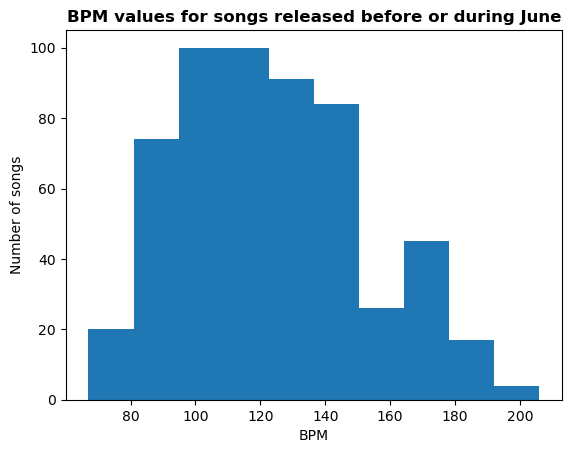

In [75]:
plt.hist(early_release['bpm'])
plt.xlabel('BPM')
plt.ylabel('Number of songs')
plt.title('BPM values for songs released before or during June', fontweight='bold')
plt.show()

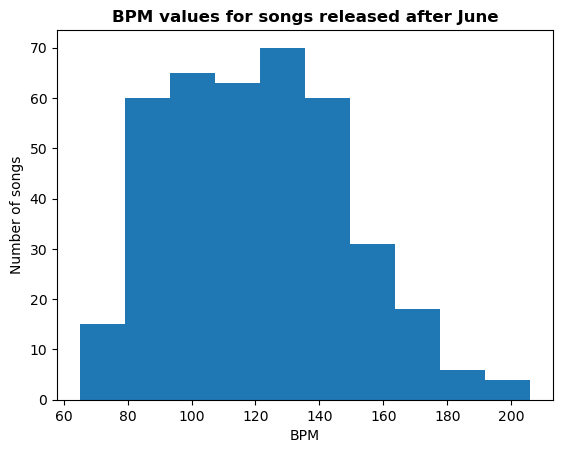

In [76]:
plt.hist(late_release['bpm'])
plt.xlabel('BPM')
plt.ylabel('Number of songs')
plt.title('BPM values for songs released after June', fontweight='bold')
plt.show()